In [23]:
from scipy import stats
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.cross_validation import train_test_split

from sklearn import metrics

from sklearn.preprocessing import normalize

from scipy.stats import pearsonr

import pickle
from scipy.cluster.hierarchy import fcluster
import collections
import csv
import math

from IPython.display import clear_output

In [ ]:
female_name = ['Seira Itou', 'Heyu', 'WANG Shuang', 'hu xinyue', 'Lucy', 'wu mengyao', 'Imada Haruna', 'Yumiko Kakuta', 'Fitra']
female_age = [20, 25, 24, 24, 23, 24, 21, 21, 23]

In [ ]:
male_name = ['WANG Chen', 'Arihiro Iwamoto', 'Daichi Harada', 'NaokiHigashi', 'Yoshida Kentaro', 'Ono Kouya', 'Kyouichiro', 'OnoAyumu', 'Han Zengyi']
male_age = [26, 22, 21, 20, 22, 21, 20, 23, 24]

In [ ]:
female_age.extend(male_age)

In [ ]:
# 22.4
np.mean(female_age)

In [24]:
folder_path = 'file:///Users/chenwang/Documents/Manuscript/Entropy_Aesthetic/Aesthetic/'

# My User Study Data
data = pd.read_csv(folder_path + 'total.csv')
entropy = pd.read_csv(folder_path + 'test/entropy.csv')

In [49]:
# entropy = pd.read_csv(folder_path + 'entropy1-590833.csv')
# entropy100 = pd.read_csv(folder_path + 'entropy100.csv')
# entropy010 = pd.read_csv(folder_path + 'entropy010.csv')
# entropy001 = pd.read_csv(folder_path + 'entropy001.csv')

# entropy100.rename(columns = {"entropy":"entropy100"}, inplace = True)
# entropy010.rename(columns = {"entropy":"entropy010"}, inplace = True)
# entropy001.rename(columns = {"entropy":"entropy001"}, inplace = True)

# entropy001

In [ ]:
# R square with aesthetic rating

# entropy 0.22180725369495646
# jpeg_file_size 0.002754522957436723
# png_size 0.1957138094206985
# number_of_colours 0.1980580800299414
# luminance_sd 0.12197354777462643
# white_space 0.08798573605962778
# grid_quality 0.05885735669780323
# edge_density 0.11440313492101051
# edge_congestion 0.48025873401669883 Negative
# figure_ground_contrast 0.00101206839016732
# pixel_symmetry 0.028035560230180834

# quadtree
# balance -0.7310027527799173
# equilibrium 0.01548761902457818
# symmetry 0.09403806376198331
# leaf nodes 0.07865451630934062

In [50]:
datad = data.groupby('title').mean().drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1).sort_values('appeal', ascending=True)

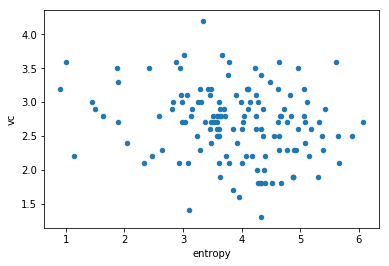

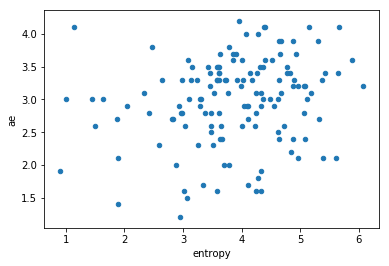

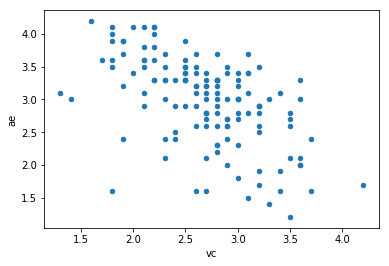

In [25]:
# Aliaksei Data

entropy_al = pd.read_csv(folder_path + 'test/entropy-aliaksei.csv')
data_al = pd.read_csv(folder_path + 'aliaksei.csv')
data_al_sort = data_al.sort_values('vc', ascending=True)

total_al = data_al_sort.join(entropy_al.set_index('title'))

total_al.plot(x = 'entropy', y = 'vc', kind = "scatter")
total_al.plot(x = 'entropy', y = 'ae', kind = "scatter")
total_al.plot(x = 'vc', y = 'ae', kind = "scatter")
plt.show()

# Zreg = LinearRegression()
# model2 = Zreg.fit(total_al['vc'].reshape(-1, 1), total_al['ae'])
# thisScore = model2.score(total_al['vc'].reshape(-1, 1), total_al['ae'])
# print(thisScore)
# 0.3044

In [26]:
# Aliaksei Data
# Seek the Hierarchical Clustering Threshold by iterate best R2

max_d = 0.01
r2 = 0
mark = 0.1

with open('test/z-aliaksei.pkl', 'rb') as f:
    wholeZ = pickle.load(f)

while max_d <= 10:
    setList = []
    for k, Z in wholeZ.items():
        # print(k)
        clusters = fcluster(Z, max_d, criterion='distance')
        # print(clusters.max())
        hist = collections.Counter(clusters)
        histData = hist.items()
        setNum = len(set(clusters))
        H = 0
        total = len(Z)
        for i in histData:
            H += (i[1]/total)*math.log((i[1]/total),2)
        setList.append([k, setNum, -H])
        
    # print(setList)
    with open('test/al/Z' + str(max_d) + '.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['title', 'clustering', 'entropy'])
        writer.writerows(setList)
        
    ZZt = pd.read_csv('test/al/Z' + str(max_d) + '.csv')
    
    ZZtable = data_al_sort.join(ZZt.set_index('title')).dropna()
#     print(ZZtable)
    
    Zreg = LinearRegression()
    model2 = Zreg.fit(ZZtable['entropy'].reshape(-1, 1), ZZtable['vc'])
    thisScore = model2.score(ZZtable['entropy'].reshape(-1, 1), ZZtable['vc'])
    print('***' + str(max_d) + '***')
    print(model2.intercept_)
    print(model2.coef_)
    print(thisScore)
    if thisScore > r2:
        r2 = thisScore
        mark = max_d
        print(r2)
    print('******')
    max_d += 0.01
print(mark)

print(r2)

# print(total_al)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


***0.01***
3.491056926894071
[-0.0994112]
0.033080290482490615
0.033080290482490615
******
***0.02***
3.414797427794946
[-0.10135788]
0.03386863580543997
0.03386863580543997
******
***0.03***
3.3760472821868444
[-0.10373922]
0.03546005786505768
0.03546005786505768
******
***0.04***
3.3723297180459935
[-0.10926452]
0.03884928764797313
0.03884928764797313
******
***0.05***
3.3138412254559553
[-0.10495564]
0.03660298331234624
******
***0.060000000000000005***
3.2877990215705633
[-0.10468501]
0.03680428358849486
******
***0.07***
3.3190538403098433
[-0.11375973]
0.04230604691351825
0.04230604691351825
******
***0.08***
3.3103956455059977
[-0.11609271]
0.04349256498354814
0.04349256498354814
******
***0.09***
3.2759442485302257
[-0.11286799]
0.04149865091423899
******
***0.09999999999999999***
3.229506229263571
[-0.10661316]
0.03705116884102977
******
***0.10999999999999999***
3.260804196465627
[-0.11521022]
0.04172431769404006
******
***0.11999999999999998***
3.2338665300158937
[-0.1119905

***0.9800000000000006***
2.972766407724433
[-0.11039626]
0.030288137412430416
******
***0.9900000000000007***
2.963037679586323
[-0.10707014]
0.028650239146079337
******
***1.0000000000000007***
2.9767308637759915
[-0.11261344]
0.031422441475667195
******
***1.0100000000000007***
2.9692519111926643
[-0.11014073]
0.029888700095771378
******
***1.0200000000000007***
2.9655087500652555
[-0.10893582]
0.029040169616685763
******
***1.0300000000000007***
2.967476617360111
[-0.10997084]
0.029457228418763085
******
***1.0400000000000007***
2.9742900343710312
[-0.11292028]
0.03079964990422046
******
***1.0500000000000007***
2.9790494342845877
[-0.11491865]
0.03175751021157547
******
***1.0600000000000007***
2.968352422582869
[-0.1110896]
0.02942683430009907
******
***1.0700000000000007***
2.9744266400954205
[-0.11359978]
0.030681000398733005
******
***1.0800000000000007***
2.9671881875247808
[-0.11113474]
0.029302505043955374
******
***1.0900000000000007***
2.9650347284557226
[-0.11052346]
0.02

***1.9500000000000015***
2.9186479095412494
[-0.11347907]
0.023392899065348693
******
***1.9600000000000015***
2.9127420031753286
[-0.11084294]
0.022188894981250762
******
***1.9700000000000015***
2.909507734851674
[-0.10951365]
0.021528052146702392
******
***1.9800000000000015***
2.911135120854961
[-0.11043058]
0.021808427045512335
******
***1.9900000000000015***
2.9071932172816206
[-0.10883126]
0.021158528659717124
******
***2.0000000000000013***
2.909375713648234
[-0.10996554]
0.021507086480507143
******
***2.010000000000001***
2.9098967397182247
[-0.11040079]
0.02156523324477566
******
***2.020000000000001***
2.902910760981832
[-0.10718544]
0.02030498590993024
******
***2.0300000000000007***
2.9035228594133815
[-0.10778154]
0.02032143320315183
******
***2.0400000000000005***
2.905711599602838
[-0.10898379]
0.020696351535466784
******
***2.0500000000000003***
2.906279933668654
[-0.10933578]
0.02071480598129205
******
***2.06***
2.9074528242203685
[-0.11012505]
0.020790344068396527
*

***2.9299999999999815***
2.8692233800573668
[-0.10502556]
0.015137036842620022
******
***2.9399999999999813***
2.8692233800573668
[-0.10502556]
0.015137036842620022
******
***2.949999999999981***
2.8692233800573668
[-0.10502556]
0.015137036842620022
******
***2.959999999999981***
2.8692233800573668
[-0.10502556]
0.015137036842620022
******
***2.9699999999999807***
2.868039197414187
[-0.10451246]
0.014819789592338426
******
***2.9799999999999804***
2.865759076245475
[-0.10341747]
0.01443392118965714
******
***2.9899999999999802***
2.8662547044637288
[-0.10386829]
0.014472036341194983
******
***2.99999999999998***
2.8660639656954676
[-0.10380332]
0.014467836864183958
******
***3.00999999999998***
2.8668880156833914
[-0.10438938]
0.01454645547128941
******
***3.0199999999999796***
2.8673446272367764
[-0.10500434]
0.014651200512022846
******
***3.0299999999999794***
2.8580495877937295
[-0.09990287]
0.013219055416221925
******
***3.039999999999979***
2.857527399894967
[-0.09966374]
0.013121

***3.899999999999961***
2.8843310159266577
[-0.12777669]
0.017487803921536038
******
***3.9099999999999606***
2.88344318094053
[-0.12739495]
0.01730121806963092
******
***3.9199999999999604***
2.88344318094053
[-0.12739495]
0.01730121806963092
******
***3.92999999999996***
2.88344318094053
[-0.12739495]
0.01730121806963092
******
***3.93999999999996***
2.88344318094053
[-0.12739495]
0.01730121806963092
******
***3.9499999999999598***
2.8796054825152417
[-0.12513498]
0.01667573510057141
******
***3.9599999999999596***
2.8742400125994627
[-0.1220113]
0.015616044982238342
******
***3.9699999999999593***
2.8752274170624545
[-0.12275627]
0.015723361453969464
******
***3.979999999999959***
2.886024589313102
[-0.12979811]
0.017516006009560603
******
***3.989999999999959***
2.8768906156441862
[-0.12414755]
0.015957151402302805
******
***3.9999999999999587***
2.8768906156441862
[-0.12414755]
0.015957151402302805
******
***4.009999999999959***
2.8715382583259994
[-0.12095215]
0.01508716844257607

***4.87999999999994***
2.797429779739144
[-0.08108023]
0.006377048336487667
******
***4.88999999999994***
2.7881473473794722
[-0.07474473]
0.005310358226443546
******
***4.89999999999994***
2.795507422732026
[-0.08016328]
0.006074704686003574
******
***4.90999999999994***
2.788082003523496
[-0.07503207]
0.005351523261940105
******
***4.9199999999999395***
2.804274723360362
[-0.08667026]
0.007125016724997212
******
***4.929999999999939***
2.7984461712570328
[-0.08269875]
0.006489814138476268
******
***4.939999999999939***
2.7984461712570328
[-0.08269875]
0.006489814138476268
******
***4.949999999999939***
2.7995342522168696
[-0.08356597]
0.006613881856822434
******
***4.959999999999939***
2.7995342522168696
[-0.08356597]
0.006613881856822434
******
***4.9699999999999385***
2.7995342522168696
[-0.08356597]
0.006613881856822434
******
***4.979999999999938***
2.7995342522168696
[-0.08356597]
0.006613881856822434
******
***4.989999999999938***
2.8019357241883593
[-0.08535285]
0.006842094196

***5.84999999999992***
2.779513877086598
[-0.07575278]
0.005156570559288864
******
***5.8599999999999195***
2.782246035548365
[-0.07806712]
0.005507676112000204
******
***5.869999999999919***
2.7875736140134384
[-0.08239275]
0.006150596092133864
******
***5.879999999999919***
2.7875736140134384
[-0.08239275]
0.006150596092133864
******
***5.889999999999919***
2.7875736140134384
[-0.08239275]
0.006150596092133864
******
***5.899999999999919***
2.781158412926704
[-0.07747642]
0.005416326088953705
******
***5.909999999999918***
2.781158412926704
[-0.07747642]
0.005416326088953705
******
***5.919999999999918***
2.781793151721124
[-0.07809876]
0.0055279744883445225
******
***5.929999999999918***
2.781793151721124
[-0.07809876]
0.0055279744883445225
******
***5.939999999999918***
2.768666876803857
[-0.06792835]
0.004153438104895324
******
***5.949999999999918***
2.768666876803857
[-0.06792835]
0.004153438104895324
******
***5.959999999999917***
2.768666876803857
[-0.06792835]
0.0041534381048

***6.829999999999899***
2.7856945287765607
[-0.09136616]
0.007545970781112632
******
***6.839999999999899***
2.7856945287765607
[-0.09136616]
0.007545970781112632
******
***6.849999999999898***
2.7879871255192645
[-0.09353668]
0.007797088614305503
******
***6.859999999999898***
2.7879871255192645
[-0.09353668]
0.007797088614305503
******
***6.869999999999898***
2.7879871255192645
[-0.09353668]
0.007797088614305503
******
***6.879999999999898***
2.7879871255192645
[-0.09353668]
0.007797088614305503
******
***6.8899999999998975***
2.778242721532999
[-0.08511374]
0.006459659710155052
******
***6.899999999999897***
2.778242721532999
[-0.08511374]
0.006459659710155052
******
***6.909999999999897***
2.778242721532999
[-0.08511374]
0.006459659710155052
******
***6.919999999999897***
2.780939569072297
[-0.08765967]
0.006794271975195998
******
***6.929999999999897***
2.796026158533818
[-0.10123101]
0.009087338325648342
******
***6.9399999999998965***
2.796026158533818
[-0.10123101]
0.0090873383

***7.809999999999878***
2.8501182981304276
[-0.16291686]
0.022401536646725173
******
***7.819999999999878***
2.8501182981304276
[-0.16291686]
0.022401536646725173
******
***7.8299999999998775***
2.8544593126733075
[-0.16775285]
0.023571910516890004
******
***7.839999999999877***
2.8544593126733075
[-0.16775285]
0.023571910516890004
******
***7.849999999999877***
2.8473938128662635
[-0.1616388]
0.022205271283921135
******
***7.859999999999877***
2.8473938128662635
[-0.1616388]
0.022205271283921135
******
***7.869999999999877***
2.8473938128662635
[-0.1616388]
0.022205271283921135
******
***7.879999999999876***
2.8384808264179484
[-0.15349732]
0.01987432474455819
******
***7.889999999999876***
2.8384808264179484
[-0.15349732]
0.01987432474455819
******
***7.899999999999876***
2.828409416016258
[-0.14386227]
0.017481769529640867
******
***7.909999999999876***
2.8322069939726573
[-0.14786773]
0.018483728122870025
******
***7.919999999999876***
2.835471942251372
[-0.15167664]
0.019214393960

***8.789999999999857***
2.80204481709396
[-0.1297566]
0.013877359431124225
******
***8.799999999999857***
2.80204481709396
[-0.1297566]
0.013877359431124225
******
***8.809999999999857***
2.8179114577374755
[-0.14784204]
0.01802580866388337
******
***8.819999999999856***
2.8179114577374755
[-0.14784204]
0.01802580866388337
******
***8.829999999999856***
2.8179114577374755
[-0.14784204]
0.01802580866388337
******
***8.839999999999856***
2.8179114577374755
[-0.14784204]
0.01802580866388337
******
***8.849999999999856***
2.8179114577374755
[-0.14784204]
0.01802580866388337
******
***8.859999999999856***
2.8179114577374755
[-0.14784204]
0.01802580866388337
******
***8.869999999999855***
2.81605404894933
[-0.14644835]
0.017481098194153333
******
***8.879999999999855***
2.81605404894933
[-0.14644835]
0.017481098194153333
******
***8.889999999999855***
2.823084197637263
[-0.15449104]
0.019408697079984605
******
***8.899999999999855***
2.823084197637263
[-0.15449104]
0.019408697079984605
*****

***9.769999999999836***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.779999999999836***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.789999999999836***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.799999999999836***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.809999999999835***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.819999999999835***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.829999999999835***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.839999999999835***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.849999999999834***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.859999999999834***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.869999999999834***
2.8519043351060325
[-0.20625284]
0.032672413723319305
******
***9.879999999999834***
2.855242132843296
[-0.21212674]
0.0353076

(54, 7)
(54,)
(18, 7)
(18,)
Total R2: 0.5787790594553585
[('entropy', 0.8038468437676584), ('jpg_size', -1.2380782397236174e-05), ('white_space', 0.1984874337103468), ('grid_quality', -0.0013379811330328868), ('figure_ground_contrast', -0.9837080011106286), ('pixel_symmetry', -0.24443194236122065), ('png_size', 1.6880071441606646e-06)]
Pearson: Total Metric/Appeal: (0.45842102812321106, 0.05570533808508556)
Pearson: Entropy/Appeal: (0.47096417453449335, 2.977155195268559e-05)
Pearson: jpg_size/Appeal: (-0.052483549398233305, 0.6614982120814248)
Pearson: white_space/Appeal: (-0.2966238966429167, 0.011402754577091827)
Pearson: grid_quality/Appeal: (-0.2426053517501279, 0.04004040644050905)
Pearson: edge_density/Appeal: (0.3382353247681421, 0.0036612347748697285)
Pearson: edge_congestion/Appeal: (-0.6930070230644844, 1.5252775223567822e-11)
Pearson: figure_ground_contrast/Appeal: (-0.031813022336259135, 0.7907897687694705)
Pearson: pixel_symmetry/Appeal: (-0.16743822810272688, 0.159771126

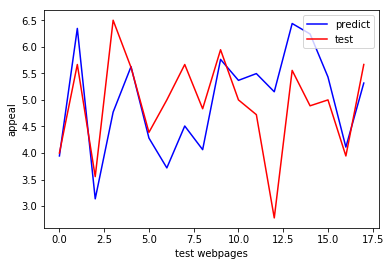

In [148]:
# 7.027465750624179
# [ 5.33571009e-01 -1.28663193e-05 -1.15735654e-01  3.35343512e-03
#   1.08346524e+01 -6.75574650e+00 -6.20601844e-01  1.81986932e-01]
# 0.6179125650844997
entropy_data =  pd.read_csv(folder_path + 'entropy.csv')
# print(jpeg_file_size_data)
total = datad.join(entropy_data.set_index('title')).dropna().join(jpeg_file_size_data.set_index('title')).join(white_space_data.set_index('title')).join(grid_quality_data.set_index('title')).join(edge_density_data.set_index('title')).join(edge_congestion_data.set_index('title')).join(figure_ground_contrast_data.set_index('title')).join(pixel_symmetry_data.set_index('title')).join(quadtree_data.set_index('title')).join(png_size_data.set_index('title'))
# print(total)

feature_cols = ['entropy', 'jpg_size', 'white_space', 'grid_quality', 'edge_density', 'edge_congestion', 'figure_ground_contrast', 'pixel_symmetry', 'png_size']

# , 'balance', 'equilibrium', 'symmetry', 'nodes'

X = total[feature_cols]

y = total['appeal']


linreg = LinearRegression()

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = linreg.fit(X_train, y_train)

# print(model)
print("Total R2: {0}".format(model.score(X_train,y_train)))
# print(linreg.intercept_)
# print(linreg.coef_)


print(list(zip(feature_cols, linreg.coef_)))

y_pred = linreg.predict(X_test)

print("Pearson: Total Metric/Appeal: {0}".format(pearsonr(y_pred, y_test)))
print("Pearson: Entropy/Appeal: {0}".format(pearsonr(total['entropy'], total['appeal'])))
print("Pearson: jpg_size/Appeal: {0}".format(pearsonr(total['jpg_size'], total['appeal'])))
print("Pearson: white_space/Appeal: {0}".format(pearsonr(total['white_space'], total['appeal'])))
print("Pearson: grid_quality/Appeal: {0}".format(pearsonr(total['grid_quality'], total['appeal'])))
print("Pearson: edge_density/Appeal: {0}".format(pearsonr(total['edge_density'], total['appeal'])))
print("Pearson: edge_congestion/Appeal: {0}".format(pearsonr(total['edge_congestion'], total['appeal'])))
print("Pearson: figure_ground_contrast/Appeal: {0}".format(pearsonr(total['figure_ground_contrast'], total['appeal'])))
print("Pearson: pixel_symmetry/Appeal: {0}".format(pearsonr(total['pixel_symmetry'], total['appeal'])))
print("Pearson: png_size/Appeal: {0}".format(pearsonr(total['png_size'], total['appeal'])))

plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("test webpages")
plt.ylabel('appeal')
plt.show()


0.22180725369495646


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


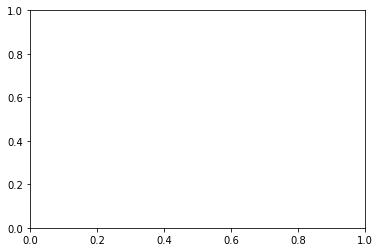

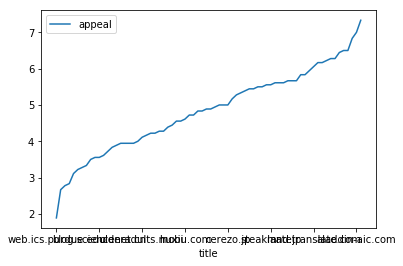

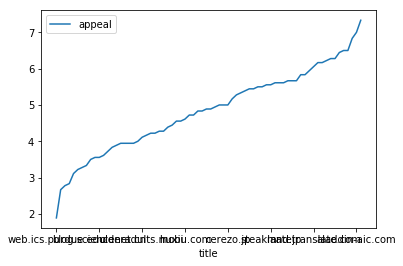

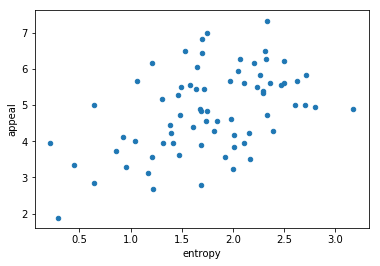

In [84]:
# entropy 0.22180725369495646
entropy_data =  pd.read_csv(folder_path + 'entropy.csv')
# print(jpeg_file_size_data)
total = datad.join(entropy_data.set_index('title')).dropna()
total.plot(x = 'entropy', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['entropy'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['entropy'].reshape(-1, 1), total['appeal'])
print(thisScore)

plt.show()


                             title  jpg_size
0        theboneandjointcenter.com    131364
1                        two-n.com    123171
2                     disney.co.jp    159969
3                    wikipedia.org     88938
4                 news.yahoo.co.jp    134220
5                        huxiu.com    145542
6                       cheshi.com    207384
7                 humblebundle.com    172113
8                  theatlantic.com    155745
9                    microsoft.com     96675
10                       opera.com     79722
11                labinthewild.org    141423
12                     richyli.com    162597
13                      pxtoem.com    119445
14                    javadrive.jp    106659
15                      jiqimao.tv    209289
16                      clamav.net     74073
17                      bootcdn.cn     79008
18                      runoob.com    115593
19                    tensorfly.cn    158337
20               journaldugeek.com    158154
21        

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


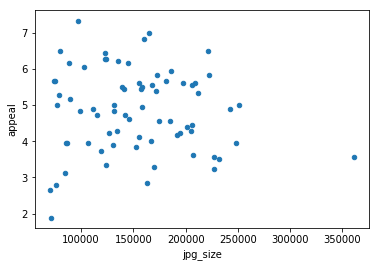

In [54]:
# jpeg_file_size 0.002754522957436723
jpeg_file_size_data =  pd.read_csv(folder_path + 'jpeg_file_size.csv')
print(jpeg_file_size_data)
total = datad.join(jpeg_file_size_data.set_index('title')).dropna()
total.plot(x = 'jpg_size', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['jpg_size'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['jpg_size'].reshape(-1, 1), total['appeal'])
print(thisScore)

plt.show()


                             title  png_size
0        theboneandjointcenter.com    311142
1                        two-n.com    268287
2                     disney.co.jp   1107672
3                    wikipedia.org     99471
4                 news.yahoo.co.jp    399741
5                        huxiu.com    677307
6                       cheshi.com    757158
7                 humblebundle.com   1320081
8                  theatlantic.com    866502
9                    microsoft.com    913563
10                       opera.com    266520
11                labinthewild.org    407616
12                     richyli.com    338544
13                      pxtoem.com    140325
14                    javadrive.jp    210255
15                      jiqimao.tv   1255383
16                      clamav.net    143745
17                      bootcdn.cn    128487
18                      runoob.com    225423
19                    tensorfly.cn   1264758
20               journaldugeek.com    863922
21        

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


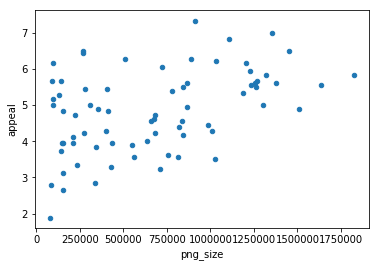

In [27]:
# png_size 0.1957138094206985
png_size_data =  pd.read_csv(folder_path + 'png_size.csv')
print(png_size_data)
total = datad.join(png_size_data.set_index('title')).dropna()
total.plot(x = 'png_size', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['png_size'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['png_size'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


                             title  number_of_colours
0        theboneandjointcenter.com               3471
1                        two-n.com               2125
2                     disney.co.jp              14436
3                    wikipedia.org                453
4                 news.yahoo.co.jp               3402
5                        huxiu.com               8260
6                       cheshi.com               8988
7                 humblebundle.com              40540
8                  theatlantic.com              12113
9                    microsoft.com              10747
10                       opera.com               2758
11                labinthewild.org               3526
12                     richyli.com               1618
13                      pxtoem.com                369
14                    javadrive.jp               1234
15                      jiqimao.tv              21479
16                      clamav.net               1210
17                      boot

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


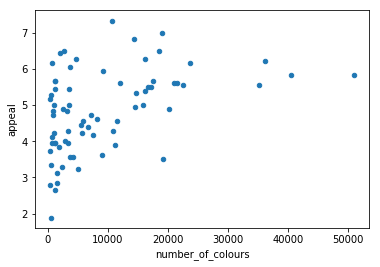

In [145]:
# number_of_colours 0.1980580800299414
number_of_colours_data =  pd.read_csv(folder_path + 'number_of_colours.csv')
print(number_of_colours_data)
total = datad.join(number_of_colours_data.set_index('title')).dropna()
total.plot(x = 'number_of_colours', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['number_of_colours'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['number_of_colours'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


                             title  luminance_sd
0        theboneandjointcenter.com     71.598772
1                        two-n.com     29.741276
2                     disney.co.jp     82.242802
3                    wikipedia.org     21.698210
4                 news.yahoo.co.jp     83.156303
5                        huxiu.com     70.783850
6                       cheshi.com     75.310118
7                 humblebundle.com     39.012533
8                  theatlantic.com     94.972111
9                    microsoft.com     73.492398
10                       opera.com     51.733108
11                labinthewild.org     35.440373
12                     richyli.com     36.556025
13                      pxtoem.com     82.555095
14                    javadrive.jp     32.707912
15                      jiqimao.tv     69.081566
16                      clamav.net    103.978329
17                      bootcdn.cn     56.218039
18                      runoob.com     26.655547
19                  

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


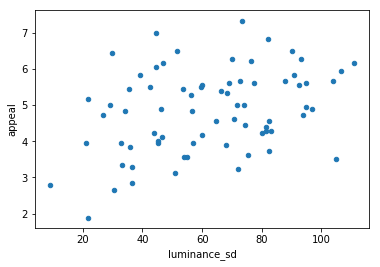

In [146]:
# luminance_sd 0.12197354777462643
luminance_sd_data =  pd.read_csv(folder_path + 'luminance_sd.csv')
print(luminance_sd_data)
total = datad.join(luminance_sd_data.set_index('title')).dropna()
total.plot(x = 'luminance_sd', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['luminance_sd'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['luminance_sd'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


0.08798573605962778


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


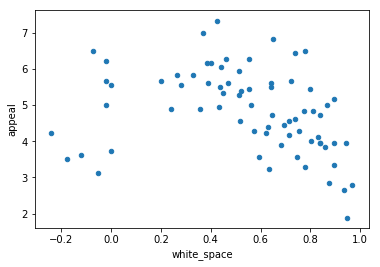

In [55]:
# white_space 0.08798573605962778
white_space_data =  pd.read_csv(folder_path + 'white_space.csv')
# print(white_space_data)
total = datad.join(white_space_data.set_index('title')).dropna()
total.plot(x = 'white_space', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['white_space'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['white_space'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


0.05885735669780323


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


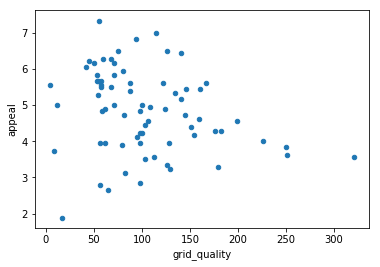

In [56]:
# grid_quality 0.05885735669780323
grid_quality_data =  pd.read_csv(folder_path + 'grid_quality.csv')
# print(white_space_data)
total = datad.join(grid_quality_data.set_index('title')).dropna()
total.plot(x = 'grid_quality', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['grid_quality'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['grid_quality'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


                             title  edge_density
0        theboneandjointcenter.com      0.068516
1                        two-n.com      0.052962
2                     disney.co.jp      0.094892
3                    wikipedia.org      0.032005
4                 news.yahoo.co.jp      0.065999
5                        huxiu.com      0.078807
6                       cheshi.com      0.105435
7                 humblebundle.com      0.148667
8                  theatlantic.com      0.088490
9                    microsoft.com      0.127031
10                       opera.com      0.039137
11                labinthewild.org      0.065298
12                     richyli.com      0.050523
13                      pxtoem.com      0.056692
14                    javadrive.jp      0.049507
15                      jiqimao.tv      0.127998
16                      clamav.net      0.043762
17                      bootcdn.cn      0.041501
18                      runoob.com      0.064470
19                  

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


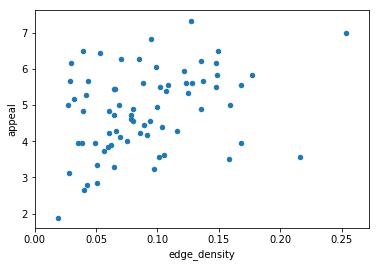

In [130]:
# edge_density 0.11440313492101051
edge_density_data =  pd.read_csv(folder_path + 'edge_density.csv')
print(edge_density_data)
total = datad.join(edge_density_data.set_index('title')).dropna()
total.plot(x = 'edge_density', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['edge_density'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['edge_density'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


                             title  edge_congestion
0        theboneandjointcenter.com         0.202366
1                        two-n.com         0.329220
2                     disney.co.jp         0.145264
3                    wikipedia.org         0.300265
4                 news.yahoo.co.jp         0.346905
5                        huxiu.com         0.350105
6                       cheshi.com         0.348615
7                 humblebundle.com         0.195258
8                  theatlantic.com         0.271575
9                    microsoft.com         0.103822
10                       opera.com         0.204029
11                labinthewild.org         0.411391
12                     richyli.com         0.499267
13                      pxtoem.com         0.340704
14                    javadrive.jp         0.302523
15                      jiqimao.tv         0.292183
16                      clamav.net         0.251924
17                      bootcdn.cn         0.255167
18          

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


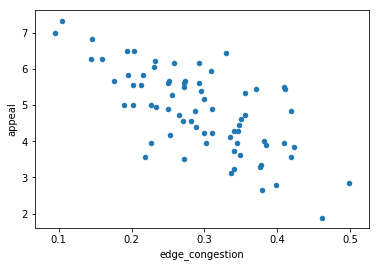

In [58]:
# edge_congestion 0.48025873401669883 Negative
edge_congestion_data =  pd.read_csv(folder_path + 'edge_congestion.csv')
print(edge_congestion_data)
total = datad.join(edge_congestion_data.set_index('title')).dropna()
total.plot(x = 'edge_congestion', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['edge_congestion'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['edge_congestion'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


                             title  figure_ground_contrast
0        theboneandjointcenter.com                1.071564
1                        two-n.com                0.956458
2                     disney.co.jp                1.031861
3                    wikipedia.org                0.901553
4                 news.yahoo.co.jp                0.947362
5                        huxiu.com                1.029062
6                       cheshi.com                1.025220
7                 humblebundle.com                1.440591
8                  theatlantic.com                1.018429
9                    microsoft.com                1.013669
10                       opera.com                1.102620
11                labinthewild.org                1.149242
12                     richyli.com                0.943982
13                      pxtoem.com                1.031747
14                    javadrive.jp                0.895744
15                      jiqimao.tv                1.0821

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


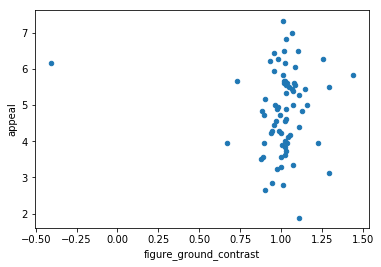

In [59]:
# figure_ground_contrast 0.00101206839016732
figure_ground_contrast_data =  pd.read_csv(folder_path + 'figure_ground_contrast.csv')
print(figure_ground_contrast_data)
total = datad.join(figure_ground_contrast_data.set_index('title')).dropna()
total.plot(x = 'figure_ground_contrast', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['figure_ground_contrast'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['figure_ground_contrast'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


                             title  pixel_symmetry
0        theboneandjointcenter.com        0.295559
1                        two-n.com        0.850134
2                     disney.co.jp        1.237900
3                    wikipedia.org        1.481059
4                 news.yahoo.co.jp        0.470587
5                        huxiu.com        0.947140
6                       cheshi.com        0.842981
7                 humblebundle.com        0.768787
8                  theatlantic.com        0.958109
9                    microsoft.com        0.514241
10                       opera.com        1.492437
11                labinthewild.org        1.469096
12                     richyli.com        2.044314
13                      pxtoem.com        0.674125
14                    javadrive.jp        1.072839
15                      jiqimao.tv        0.655947
16                      clamav.net        0.248931
17                      bootcdn.cn        1.004392
18                      runoob.

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


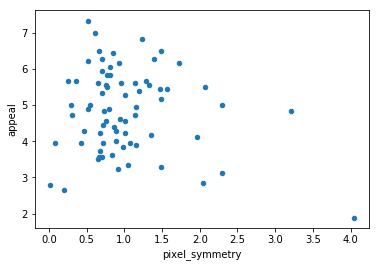

In [62]:
# pixel_symmetry 0.028035560230180834
pixel_symmetry_data =  pd.read_csv(folder_path + 'pixel_symmetry.csv')
print(pixel_symmetry_data)
total = datad.join(pixel_symmetry_data.set_index('title')).dropna()
total.plot(x = 'pixel_symmetry', y = 'appeal', kind = "scatter")
Zreg = LinearRegression()
model2 = Zreg.fit(total['pixel_symmetry'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['pixel_symmetry'].reshape(-1, 1), total['appeal'])
print(thisScore)
plt.show()


                             title   balance  equilibrium  symmetry  nodes
0        theboneandjointcenter.com  0.775012     0.785116  0.999546   1726
1                        two-n.com  0.692208     0.678577  0.999197    976
2                     disney.co.jp  0.782029     0.762545  0.999487   1528
3                    wikipedia.org -0.333271     0.516426  0.990085     79
4                 news.yahoo.co.jp  0.654790     0.529784  0.999257   1054
5                        huxiu.com  0.473184     0.465627  0.999169    943
6                       cheshi.com  0.782100     0.839101  0.999542   1711
7                 humblebundle.com  0.916841     0.901468  0.999764   3322
8                  theatlantic.com  0.530895     0.711444  0.999444   1408
9                    microsoft.com  0.820906     0.665663  0.999521   1636
10                       opera.com  0.432005     0.471452  0.998753    628
11                labinthewild.org  0.818700     0.873381  0.999488   1531
12                     ri

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent rele

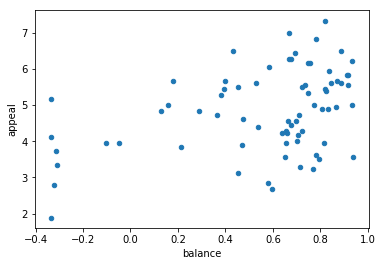

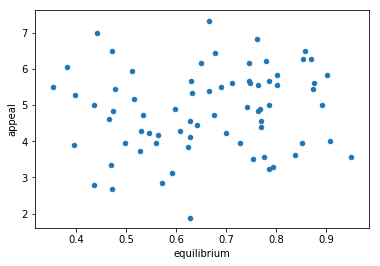

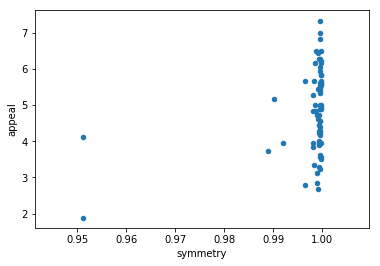

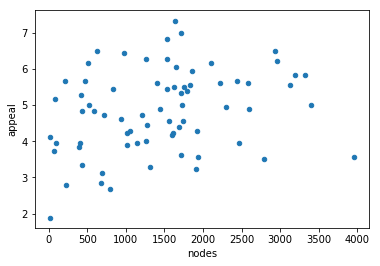

In [116]:
# quadtree
# balance -0.7310027527799173
# equilibrium 0.01548761902457818
# symmetry 0.09403806376198331
# leaf nodes 0.07865451630934062
quadtree_data =  pd.read_csv(folder_path + 'quad_value_1.csv')
print(quadtree_data)
total = datad.join(quadtree_data.set_index('title')).dropna()
total.plot(x = 'balance', y = 'appeal', kind = "scatter")
total.plot(x = 'equilibrium', y = 'appeal', kind = "scatter")
total.plot(x = 'symmetry', y = 'appeal', kind = "scatter")
total.plot(x = 'nodes', y = 'appeal', kind = "scatter")

Zreg = LinearRegression()
model1 = Zreg.fit(total['balance'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['balance'].reshape(-1, 1), total['appeal'])
print(thisScore)

model2 = Zreg.fit(total['equilibrium'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['equilibrium'].reshape(-1, 1), total['appeal'])
print(thisScore)

model3 = Zreg.fit(total['symmetry'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['symmetry'].reshape(-1, 1), total['appeal'])
print(thisScore)

model4 = Zreg.fit(total['nodes'].reshape(-1, 1), total['appeal'])
thisScore = model2.score(total['nodes'].reshape(-1, 1), total['appeal'])
print(thisScore)

plt.show()


In [35]:
# total = datad.join(entropy100.set_index('title')).join(entropy010.set_index('title')).join(entropy001.set_index('title'))
total = datad.join(entropy.set_index('title'))

In [36]:
total = total.dropna()

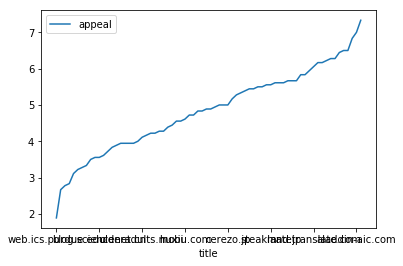

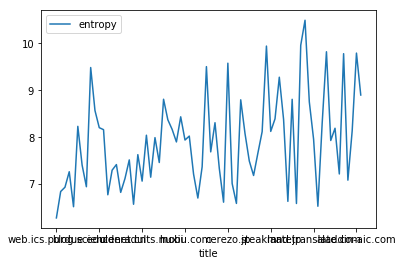

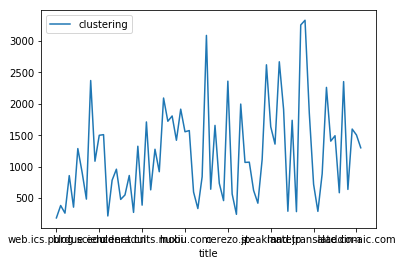

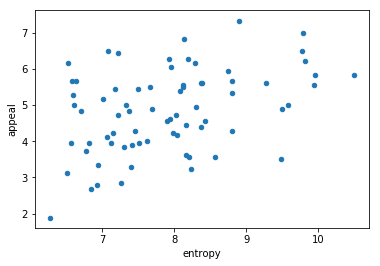

In [37]:
total.plot(y = 'appeal', use_index=True)
total.plot(y = 'entropy', use_index=True)
total.plot(y = 'clustering', use_index=True)
total.plot(x = 'entropy', y = 'appeal', kind = "scatter")

plt.show()

In [38]:
# entropy.sort_values(by='entropy')

In [39]:
# total.plot('entropy', 'appeal', kind='scatter')

In [40]:
with open('test/z.pkl', 'rb') as f:
    wholeZ = pickle.load(f)
wholeZ.keys()
# print(wholeZ)

dict_keys(['theboneandjointcenter.com', 'two-n.com', 'disney.co.jp', 'wikipedia.org', 'news.yahoo.co.jp', 'huxiu.com', 'cheshi.com', 'humblebundle.com', 'theatlantic.com', 'microsoft.com', 'opera.com', 'labinthewild.org', 'richyli.com', 'pxtoem.com', 'javadrive.jp', 'jiqimao.tv', 'clamav.net', 'bootcdn.cn', 'runoob.com', 'tensorfly.cn', 'journaldugeek.com', 'matetranslate.com', 'kameisyouten.ocnk.net', 'gingerweb.jp', 'cp.pocky.jp', 'aladdin-aic.com', 'kokage-m.com', 'steakland.jp', 'showroomprive.com', 'imas-cg.net', 'filetender.com', 'hexo.io', 'yinwang.org', 'blog.yitianshijie.net', 'yatani.jp', 'qiita.com', '52nlp.cn', 'guidetojapanese.org', 'olderadults.mobi', 'blog.whatsapp.com', 'lomake.fi', 'bgmaimuna.com', '0dt.net', 'web.ics.purdue.edu', 'canon-foundation.jp', 'blog.sciencenet.cn', 'pantone.com', 'news.livedoor.com', 'gmo.jp', 'tokai-tv.com', 'life-is-tech.com', 'bloomberg.co.jp', 'cerezo.jp', 'tech.nikkeibp.co.jp', 'jp.techcrunch.com', 'capcom.co.jp', 'sankei.com', 'tech-jp.

In [41]:
# clusters = fcluster(wholeZ['interaction-design.org'], 0.01, criterion='distance')
# hist = collections.Counter(clusters)
# histData = hist.items()
# setNum = len(set(clusters))
# print(setNum)

In [42]:
max_d = 0.01
r2 = 0
mark = 0.1

while max_d <= 10:
    setList = []
    for k, Z in wholeZ.items():
        # print(k)
        clusters = fcluster(Z, max_d, criterion='distance')
        # print(clusters.max())
        hist = collections.Counter(clusters)
        histData = hist.items()
        setNum = len(set(clusters))
        H = 0
        total = len(Z)
        for i in histData:
            H += (i[1]/total)*math.log((i[1]/total),2)
        setList.append([k, setNum, -H])
        
    # print(setList)
    with open('test/Z' + str(max_d) + '.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['title', 'clustering', 'entropy'])
        writer.writerows(setList)
        
    ZZt = pd.read_csv('test/Z' + str(max_d) + '.csv')
    ZZtable = datad.join(ZZt.set_index('title')).dropna()
    # print(ZZtable)
    Zreg = LinearRegression()
    model2 = Zreg.fit(ZZtable['entropy'].reshape(-1, 1), ZZtable['appeal'])
    thisScore = model2.score(ZZtable['entropy'].reshape(-1, 1), ZZtable['appeal'])
    print('***' + str(max_d) + '***')
    print(model2.intercept_)
    print(model2.coef_)
    print(thisScore)
    if thisScore > r2:
        r2 = thisScore
        mark = max_d
        print(r2)
    print('******')
    max_d += 0.01
print(mark)
# 3.18
print(r2)

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
%matplotlib inline

entropy1 = pd.read_csv(folder_path + 'test/Z4.119999999999957.csv')
total1 = datad.join(entropy1.set_index('title')).dropna()

# entropyX = ['entropy100','entropy010','entropy001']
# entropyX = ['entropy100','entropy001']

sns.pairplot(total1, x_vars='clustering', y_vars='entropy', height=7, aspect=0.8)
linreg = LinearRegression()
model3 = linreg.fit(total1['entropy'].reshape(-1, 1), total1['clustering'])

print(model3)
print(model3.score(total1['entropy'].reshape(-1, 1),total1['clustering']))
print(model3.intercept_)
print(model3.coef_)

total1.plot(x = 'entropy', y = 'appeal', kind = "scatter")

In [ ]:
sns.pairplot(total, x_vars='title', y_vars='appeal', height=7, aspect=0.8)
sns.pairplot(total, x_vars='title', y_vars='entropy', height=7, aspect=0.8)

In [ ]:
fig = plt.figure()
# ax = fig.add_subplot(121)
plt.plot(total['entropy'],total['appeal'])
plt.show()

In [ ]:
X = total['entropy']

y = total['appeal']

print(X.head())
print(y.head())

X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
linreg = LinearRegression()
# X = total['entropy'].values.reshape(-1,1)

# X1 = total['entropy100'].values.reshape(-1,1)
# X2 = total['entropy010'].values.reshape(-1,1)
# X3 = total['entropy001'].values.reshape(-1,1)

# X = total[['entropy100', 'entropy010', 'entropy001']]

# Y = total['appeal'].values.reshape(-1,1)

In [30]:
model = linreg.fit(X_train.reshape(-1, 1), y_train)

print(model)
print(model.score(X.reshape(-1, 1),y))
print(model.intercept_)
print(model.coef_)

zip(entropy, linreg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
0.07665885532103012
3.3212289078669235
[0.40605556]


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [32]:
y_pred = linreg.predict(X_test.reshape(-1, 1))
print(y_pred)

[5.45328178 4.86756984 4.91763094 5.04478084 4.9317271  4.81297398
 4.95591744 4.70461489 5.37403118 5.42689535 5.29860066 4.89611461
 4.86762485 5.19426711 4.71518411 5.09032746 5.18452044 4.99009826
 5.22362489 4.79177258 4.70132511 5.36383149 5.04754614 4.61235282
 4.9731299 ]


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [33]:
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i])**2
sum_erro = np.sqrt(sum_mean/50)

print("RMSE by hand:", sum_erro)

RMSE by hand: 0.669771243258582


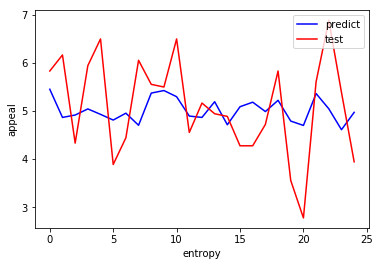

In [34]:
plt.figure()
plt.subplot(1,2,2)

plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")



plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("entropy")
plt.ylabel('appeal')
plt.show()


In [36]:
# plt.plot(Y, predictions, '-')

# 0.1436440745316806
# model.score(X1, Y)

In [37]:
plt.show()